In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_dataset.csv')
df.head()

,Unnamed: 0,policy_id,age,gender,vehicle_type,vehicle_age,annual_premium,num_claims,claim_amount,feature_1,...,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42
0,0,1,56,male,truck,2,3671.117535,7,75429.963879,51.386653,...,4.699707,82.455588,74.301058,65.804104,83.483757,52.199964,87.548238,23.929053,88.126546,42.483331
1,1,2,69,male,car,1,1545.605412,6,33357.786216,79.664487,...,3.786561,74.200051,85.929448,64.898073,39.717480,90.496702,14.221221,55.674902,64.393126,44.114695
2,2,3,46,female,truck,4,3499.550548,5,71619.141007,33.798155,...,3.165210,98.075295,35.775205,1.854480,10.092992,48.380313,43.528704,28.903443,61.063082,63.408236
3,3,4,32,male,car,14,317.592552,1,7606.223595,70.549002,...,69.764912,53.407485,66.083198,15.227401,79.152976,47.614854,88.848126,39.616004,38.724096,21.653479
4,4,5,60,male,truck,1,1669.459236,6,35278.155506,18.750446,...,53.613547,8.920582,80.204091,85.620269,55.374010,47.039861,14.771202,69.315756,2.813541,33.318385


In [3]:
df = df.iloc[:,1:]
df.shape

(1000, 50)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   policy_id       1000 non-null   int64  
 1   age             1000 non-null   int64  
 2   gender          1000 non-null   object 
 3   vehicle_type    1000 non-null   object 
 4   vehicle_age     1000 non-null   int64  
 5   annual_premium  1000 non-null   float64
 6   num_claims      1000 non-null   int64  
 7   claim_amount    1000 non-null   float64
 8   feature_1       1000 non-null   float64
 9   feature_2       1000 non-null   float64
 10  feature_3       1000 non-null   float64
 11  feature_4       1000 non-null   float64
 12  feature_5       1000 non-null   float64
 13  feature_6       1000 non-null   float64
 14  feature_7       1000 non-null   float64
 15  feature_8       1000 non-null   float64
 16  feature_9       1000 non-null   float64
 17  feature_10      1000 non-null   fl

In [6]:
# splitting the data into independent variable and dependent variable
x = df.drop(columns=['policy_id', 'claim_amount'], axis=1)
x.shape

(1000, 48)

In [23]:
y = df['claim_amount']
y.shape

(1000,)

In [24]:
# Define column transformer for preprocessing
numerical_feature = x.select_dtypes(include=['int64','float64']).columns
categorical_feature = x.select_dtypes(include=['object']).columns

In [25]:
numerical_feature

Index(['age', 'vehicle_age', 'annual_premium', 'num_claims', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42'],
      dtype='object')

In [26]:
x[numerical_feature].describe()

,age,vehicle_age,annual_premium,num_claims,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,9.990000,2680.915652,4.608000,48.846222,50.391891,51.292774,50.424627,50.035762,48.458416,...,49.521566,50.165629,50.002452,50.143840,50.967243,51.033938,50.105071,50.968364,49.603877,50.317481
std,18.114267,5.541896,1366.469446,2.850344,29.322864,28.500260,29.131623,28.394978,28.940881,28.961167,...,28.484796,29.073693,28.970386,29.151076,29.170810,29.118933,29.025365,28.688671,29.095515,28.412395
min,18.000000,1.000000,202.125351,0.000000,0.062752,0.160119,0.181203,0.135552,0.018520,0.102230,...,0.083636,0.020317,0.096369,0.136536,0.031445,0.404443,0.009327,0.192418,0.220395,0.122299
25%,35.000000,5.000000,1533.866660,2.000000,22.528288,26.578832,26.328031,26.609260,26.137697,24.420998,...,24.905663,26.365356,25.806347,25.066327,25.965889,25.885157,25.251510,25.968352,24.251964,26.369119
50%,50.000000,10.000000,2752.319542,5.000000,49.068564,50.988241,52.242859,50.973482,49.653686,48.087985,...,48.841580,49.378119,49.984326,49.326604,51.195838,50.603456,50.626251,52.007184,49.879127,50.818910
75%,66.000000,15.000000,3854.688740,7.000000,73.019523,74.730535,77.117121,75.769905,74.180312,73.124886,...,74.589511,73.684246,75.976295,75.729745,77.155239,76.893006,75.596095,76.619673,74.023583,74.583449
max,79.000000,19.000000,4997.810810,9.000000,99.984924,99.975156,99.974127,99.931627,99.949635,99.963563,...,99.751500,99.942852,99.918657,99.898460,99.876357,99.578877,99.979711,99.914675,99.850311,99.810747


In [11]:
len(numerical_feature)

46

In [12]:
len(categorical_feature)

2

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [27]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_feature),
                                               ('cat', OneHotEncoder(), categorical_feature)])

In [28]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['age', 'vehicle_age', 'annual_premium', 'num_claims', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19'...
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['gender', 'vehicle_type'], dtype='object'))])

In [29]:
# splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
x_train

,age,gender,vehicle_type,vehicle_age,annual_premium,num_claims,feature_1,feature_2,feature_3,feature_4,...,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42
29,38,male,truck,5,2835.106157,9,69.012312,66.033583,58.507782,83.249870,...,81.676499,7.239289,55.269802,75.261199,82.492724,87.449179,70.433243,46.245108,48.159958,43.276940
535,31,female,car,17,4707.474061,6,85.312817,6.969070,66.918365,19.570775,...,39.331220,85.523334,38.786799,41.793875,16.095728,38.744334,3.027250,36.574549,22.290187,54.954985
695,68,male,car,7,3818.552354,3,10.626590,1.340945,12.989880,26.623349,...,1.172312,74.485953,78.775043,54.515724,63.641286,99.511116,39.849440,79.336128,56.971739,10.092868
557,59,female,truck,15,4074.508730,5,40.689843,15.892477,97.742295,10.730121,...,72.948009,72.300057,27.792890,34.777679,46.659354,65.107317,64.084862,22.063028,29.112364,62.524505
836,63,female,motorcycle,5,1242.708255,3,69.251401,87.216115,92.654778,79.618595,...,15.717803,61.321614,68.203899,70.016422,62.585351,34.960651,96.227504,94.601693,53.240694,94.395996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,32,female,car,8,3899.746968,1,81.609235,35.978941,72.547803,11.040950,...,15.275256,68.879889,94.630308,9.141270,64.620419,12.629630,37.118390,24.755753,86.606118,22.731958
270,75,female,motorcycle,7,4304.993528,3,96.655892,26.308003,64.019387,30.600097,...,26.303692,61.488300,65.294239,98.850924,52.194302,13.739350,17.715826,4.575304,58.779730,31.701961
860,21,female,truck,15,3436.442442,9,15.915908,14.282411,25.325282,15.406165,...,20.288114,99.150144,5.189408,17.424931,77.115269,50.699103,88.487954,40.170387,38.995894,53.034963
435,47,female,truck,14,668.068763,5,90.610093,9.976356,41.521376,60.534363,...,46.491137,40.117542,91.288754,78.265825,13.258171,21.324872,53.318145,81.000003,77.454397,49.596618


In [32]:
x_train1 = x_train.drop(['gender','vehicle_type'], axis=1)
x_test1 = x_test.drop(['gender','vehicle_type'], axis=1)

In [33]:
from scipy.stats import pearsonr

In [34]:
# correlation analysis

correlations = {}
for col in numerical_feature:
    corr, _ = pearsonr(x[col], y)
    correlations[col] = corr

In [35]:
correlations

{'age': 0.07716121305041079,
 'vehicle_age': -0.0159607581739013,
 'annual_premium': 0.999731580833913,
 'num_claims': -0.010707268573059803,
 'feature_1': 0.05137717319254567,
 'feature_2': 0.02367058142640543,
 'feature_3': 0.017066400967332924,
 'feature_4': 0.010673090523762183,
 'feature_5': -0.03259644234892623,
 'feature_6': -0.06757797843737247,
 'feature_7': -0.02877326392337091,
 'feature_8': -0.05244683226340418,
 'feature_9': 0.0441650711308645,
 'feature_10': -0.05896651282299013,
 'feature_11': 0.012291060764136856,
 'feature_12': -0.018372341494662228,
 'feature_13': 0.0025523521574060543,
 'feature_14': 0.053300593771369933,
 'feature_15': 0.036040035606415194,
 'feature_16': 0.008902988933259571,
 'feature_17': 0.02189713868817563,
 'feature_18': -0.020814048202977407,
 'feature_19': 0.006474115948059427,
 'feature_20': -0.012412207052737602,
 'feature_21': -0.009744548789629812,
 'feature_22': 0.021057663673815064,
 'feature_23': 0.00936276328831853,
 'feature_24': -0

In [36]:
# Chi-Square Test
from scipy.stats import chi2_contingency
chi2_result = {}

for col in categorical_feature:
    contingency_table = pd.crosstab(x[col], y)
    chi2,p,_,_ = chi2_contingency(contingency_table)
    chi2_result[col]= (chi2, p)    

print("\nChi-Square Test:")
for key, value in chi2_result.items():
    print(f"{key}: chi2={value[0]:.4f}, p-value={value[1]:.4f}")


Chi-Square Test:
gender: chi2=1000.0000, p-value=0.4851
vehicle_type: chi2=2000.0000, p-value=0.4832


In [37]:
chi2_result

{'gender': (1000.0000000000001, 0.48513148927490046),
 'vehicle_type': (2000.0, 0.483180144471063)}

In [38]:
# ANOVA Test
from scipy.stats import f_oneway
anova_results = {}
for col in categorical_feature:
    categories = x[col].unique()
    groups = [y[x[col]==category] for category in categories]
    f_val, p_val = f_oneway(*groups)
    anova_results[col] = (f_val, p_val)

print("\nANOVA Test:")
for key, value in anova_results.items():
    print(f"{key}: F = {value[0]:.4f}, p-value = {value[1]:.4f}")


ANOVA Test:
gender: F = 4.8047, p-value = 0.0286
vehicle_type: F = 0.4899, p-value = 0.6128


In [39]:
# Mutual Information
# variance inflation factor
# Permutation method
# T-test, Z-Test
# Feature importance - random forest, gradient boosting etc...
# PCA 
# RFE technique (recursive Feature Elimination)
# LDA

# Pipeline
# model building - all regression model
# hyperparameter
# best model

In [40]:
# B0, b1, b2,b3....
# intercept 
# co-efficient/slope -

In [41]:
# Mutual information
from sklearn.feature_selection import mutual_info_regression
mutual_score = mutual_info_regression(x.select_dtypes(include=['int64','float64']), y, random_state=42)
mutual_score = pd.Series(mutual_score, name='Mutual Score', index= numerical_feature)
mutual_score = mutual_score.sort_values(ascending=False)
print('\nMutual Information Scores:')
print(mutual_score)


Mutual Information Scores:
annual_premium    3.624767
feature_23        0.055671
feature_30        0.049938
feature_19        0.045923
feature_16        0.037371
feature_35        0.031831
feature_38        0.028325
feature_24        0.026669
feature_29        0.025102
feature_42        0.019213
feature_37        0.016966
feature_1         0.013602
feature_14        0.013343
feature_31        0.011160
feature_7         0.009856
feature_20        0.007409
feature_17        0.005780
feature_10        0.001686
feature_4         0.001616
feature_11        0.000372
feature_13        0.000000
feature_5         0.000000
feature_41        0.000000
feature_40        0.000000
feature_39        0.000000
num_claims        0.000000
feature_2         0.000000
feature_36        0.000000
feature_3         0.000000
feature_34        0.000000
feature_33        0.000000
feature_32        0.000000
feature_28        0.000000
feature_6         0.000000
feature_12        0.000000
feature_27        0.000000


In [42]:
# Feature Importance from RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train1, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Random Forest")
for i in range(x_train1.shape[1]):
    print(f"{x_train1.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Random Forest
annual_premium: 0.9995
age: 0.0001
feature_31: 0.0000
feature_30: 0.0000
feature_1: 0.0000
feature_34: 0.0000
feature_32: 0.0000
feature_29: 0.0000
vehicle_age: 0.0000
feature_17: 0.0000
feature_27: 0.0000
feature_15: 0.0000
feature_21: 0.0000
feature_38: 0.0000
feature_28: 0.0000
feature_18: 0.0000
feature_19: 0.0000
feature_6: 0.0000
feature_4: 0.0000
feature_40: 0.0000
feature_7: 0.0000
feature_10: 0.0000
feature_16: 0.0000
feature_35: 0.0000
feature_9: 0.0000
feature_24: 0.0000
feature_39: 0.0000
feature_20: 0.0000
feature_13: 0.0000
feature_3: 0.0000
feature_33: 0.0000
feature_37: 0.0000
feature_36: 0.0000
feature_23: 0.0000
feature_12: 0.0000
feature_26: 0.0000
feature_2: 0.0000
feature_5: 0.0000
feature_8: 0.0000
feature_25: 0.0000
feature_41: 0.0000
feature_42: 0.0000
feature_14: 0.0000
feature_22: 0.0000
feature_11: 0.0000
num_claims: 0.0000


In [43]:
# Feature Importance from Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train1, y_train)
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Gradient Boosting")
for i in range(x_train1.shape[1]):
    print(f"{x_train1.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Gradient Boosting
annual_premium: 0.9997
age: 0.0002
vehicle_age: 0.0000
feature_38: 0.0000
feature_32: 0.0000
feature_4: 0.0000
feature_8: 0.0000
feature_18: 0.0000
feature_33: 0.0000
feature_42: 0.0000
feature_20: 0.0000
feature_3: 0.0000
feature_34: 0.0000
feature_35: 0.0000
feature_29: 0.0000
feature_37: 0.0000
feature_19: 0.0000
feature_25: 0.0000
feature_10: 0.0000
feature_14: 0.0000
feature_12: 0.0000
num_claims: 0.0000
feature_6: 0.0000
feature_28: 0.0000
feature_15: 0.0000
feature_23: 0.0000
feature_17: 0.0000
feature_40: 0.0000
feature_1: 0.0000
feature_9: 0.0000
feature_41: 0.0000
feature_7: 0.0000
feature_16: 0.0000
feature_22: 0.0000
feature_11: 0.0000
feature_36: 0.0000
feature_31: 0.0000
feature_13: 0.0000
feature_5: 0.0000
feature_24: 0.0000
feature_2: 0.0000
feature_26: 0.0000
feature_21: 0.0000
feature_30: 0.0000
feature_27: 0.0000
feature_39: 0.0000


In [33]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
x1 = x.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data['feature'] = x1.columns
vif_data['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
print(vif_data)

           feature       VIF
0              age  8.594459
1      vehicle_age  4.292580
2   annual_premium  5.040663
3       num_claims  3.746334
4        feature_1  3.823772
5        feature_2  4.316163
6        feature_3  4.219152
7        feature_4  4.288121
8        feature_5  4.126181
9        feature_6  3.890146
10       feature_7  4.280942
11       feature_8  4.204804
12       feature_9  4.094433
13      feature_10  4.108627
14      feature_11  4.322754
15      feature_12  3.976009
16      feature_13  3.946132
17      feature_14  4.233863
18      feature_15  4.275668
19      feature_16  3.948509
20      feature_17  4.282447
21      feature_18  3.908875
22      feature_19  4.219085
23      feature_20  4.217293
24      feature_21  4.128612
25      feature_22  4.307338
26      feature_23  4.362087
27      feature_24  4.058553
28      feature_25  4.156212
29      feature_26  4.233437
30      feature_27  4.038596
31      feature_28  4.035315
32      feature_29  3.954724
33      featur

In [36]:
x.head(2)

,age,gender,vehicle_type,vehicle_age,annual_premium,num_claims,feature_1,feature_2,feature_3,feature_4,...,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42
0,56,male,truck,2,3671.117535,7,51.386653,71.810174,16.360842,29.376187,...,4.699707,82.455588,74.301058,65.804104,83.483757,52.199964,87.548238,23.929053,88.126546,42.483331
1,69,male,car,1,1545.605412,6,79.664487,58.145395,36.276713,27.734676,...,3.786561,74.200051,85.929448,64.898073,39.717480,90.496702,14.221221,55.674902,64.393126,44.114695


In [44]:
x1 = x.copy()
x1 = pd.get_dummies(x1, columns=['gender', 'vehicle_type'], drop_first=True)
x1.head(2)

,age,vehicle_age,annual_premium,num_claims,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,gender_male,vehicle_type_motorcycle,vehicle_type_truck
0,56,2,3671.117535,7,51.386653,71.810174,16.360842,29.376187,56.412694,63.299944,...,65.804104,83.483757,52.199964,87.548238,23.929053,88.126546,42.483331,True,False,True
1,69,1,1545.605412,6,79.664487,58.145395,36.276713,27.734676,65.393136,5.302577,...,64.898073,39.717480,90.496702,14.221221,55.674902,64.393126,44.114695,True,False,False


In [45]:
x1['gender_male'] = np.where(x1['gender_male']==True, 1, 0)
x1['vehicle_type_motorcycle'] = np.where(x1['vehicle_type_motorcycle']==True, 1, 0)
x1['vehicle_type_truck'] = np.where(x1['vehicle_type_truck']==True, 1, 0)

In [46]:
x1.head(2)

,age,vehicle_age,annual_premium,num_claims,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,gender_male,vehicle_type_motorcycle,vehicle_type_truck
0,56,2,3671.117535,7,51.386653,71.810174,16.360842,29.376187,56.412694,63.299944,...,65.804104,83.483757,52.199964,87.548238,23.929053,88.126546,42.483331,1,0,1
1,69,1,1545.605412,6,79.664487,58.145395,36.276713,27.734676,65.393136,5.302577,...,64.898073,39.717480,90.496702,14.221221,55.674902,64.393126,44.114695,1,0,0


In [47]:
x_train1, x_test1,y_train1, y_test1 = train_test_split(x1, y, test_size=0.2, random_state=42) 

In [48]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
#print(x_train, x_test, y_train, y_test)
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
x_train_scaled = scaled.fit_transform(x_train1)
x_test_scaled = scaled.transform(x_test1)

In [49]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train1.columns)

In [50]:
x_train_scaled.head()

,age,vehicle_age,annual_premium,num_claims,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,gender_male,vehicle_type_motorcycle,vehicle_type_truck
0,-0.656952,-0.891486,0.111844,1.551197,0.703673,0.535147,0.247675,1.163076,-1.682713,-0.316229,...,0.860102,1.067813,1.251669,0.699397,-0.180630,-0.030091,-0.246337,0.925283,-0.750000,1.500677
1,-1.044412,1.246477,1.477557,0.495063,1.260319,-1.528114,0.533658,-1.078912,-1.663105,-0.184911,...,-0.296761,-1.187483,-0.431478,-1.622828,-0.518603,-0.909823,0.162479,-1.080751,-0.750000,-0.666366
2,1.003591,-0.535159,0.829174,-0.561071,-1.290141,-1.724717,-1.300058,-0.830607,1.655388,-0.446954,...,0.142994,0.427490,1.668507,-0.354255,0.975858,0.269564,-1.408020,0.925283,-0.750000,-0.666366
3,0.505428,0.890150,1.015869,0.143018,-0.263511,-1.216398,1.581755,-1.390170,1.340517,0.334215,...,-0.539290,-0.149333,0.479577,0.480687,-1.025762,-0.677827,0.427467,-1.080751,-0.750000,1.500677
4,0.726834,-0.891486,-1.049657,-0.561071,0.711837,1.275101,1.408766,1.035227,0.598952,-1.543338,...,0.678806,0.391623,-0.562235,1.588043,1.509369,0.142685,1.543200,-1.080751,1.333333,-0.666366


In [51]:
pca = PCA(n_components=None)
pca.fit_transform(x_train_scaled)

array([[ 0.6325677 ,  1.86011518,  0.44229401, ...,  0.49839365,
         1.11965675, -0.39267546],
       [-0.73455047, -0.00834513, -0.97738068, ...,  1.04485745,
         0.88653279,  1.00871921],
       [ 1.11686517, -0.50987292,  0.33445507, ...,  0.08300659,
         0.97041846,  0.36130015],
       ...,
       [ 1.61826663, -2.77485575, -1.01628015, ...,  1.46289969,
         1.90935546, -0.54998022],
       [ 0.69365378,  2.72698642,  0.2599722 , ..., -0.62144826,
        -1.22293743, -0.51501327],
       [ 1.24088875, -0.41548986, -0.73348229, ..., -0.44200975,
         0.41917707, -0.69298536]])

In [52]:
pca.explained_variance_ratio_

array([0.0343102 , 0.03026875, 0.02985287, 0.02948039, 0.0288317 ,
       0.0277851 , 0.02721493, 0.02681994, 0.02670372, 0.02604883,
       0.02513667, 0.02476753, 0.02452674, 0.02437124, 0.02393433,
       0.02335997, 0.02304725, 0.02241069, 0.02174975, 0.02151759,
       0.02119979, 0.02103061, 0.02060835, 0.02038318, 0.0200504 ,
       0.01988825, 0.01901031, 0.01878705, 0.01846021, 0.01792236,
       0.01775984, 0.01757922, 0.01728116, 0.01695239, 0.01668021,
       0.01638264, 0.0160054 , 0.01578   , 0.01532381, 0.01506553,
       0.01490994, 0.01438147, 0.01387732, 0.01339333, 0.01286224,
       0.01285614, 0.01240726, 0.01188912, 0.00913429])

In [53]:
pca = PCA(n_components=5)
pca.fit(x_train_scaled, y_train1)

PCA(n_components=5)

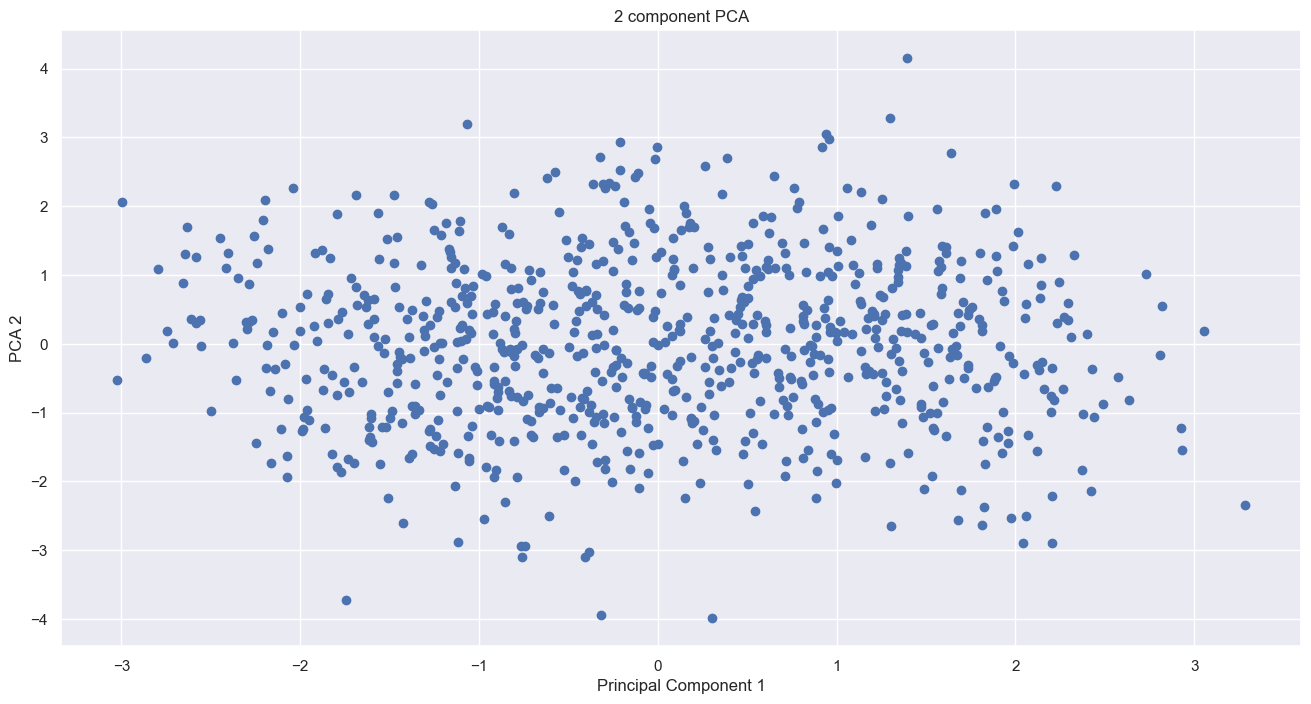

In [54]:
# another way 
pca = PCA(n_components=2)
pcacomponent = pca.fit_transform(x_train_scaled)
pcadf = pd.DataFrame(data=pcacomponent, columns=['PCA1', 'PCA2'])
plt.figure(figsize=(16,8))
plt.xlabel('Principal Component 1')
plt.ylabel('PCA 2')
plt.title('2 component PCA')
plt.scatter(pcadf['PCA1'], pcadf['PCA2'])
plt.show()

# Model Building

In [55]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle


In [56]:
GradientBoostingRegressor()

GradientBoostingRegressor()

In [58]:
# Define Models
from sklearn.pipeline import Pipeline
lr_model = Pipeline(steps=[("preprocessor", preprocessor), ("Regressor", LinearRegression())])
ada_model = Pipeline(steps=[("preprocessor", preprocessor), ("Regressor", AdaBoostRegressor())])
gra_model = Pipeline(steps=[("preprocessor", preprocessor), ("Regressor", GradientBoostingRegressor())])
rf_model = Pipeline(steps=[("preprocessor", preprocessor), ("Regressor", RandomForestRegressor())])
dt_model = Pipeline(steps=[("preprocessor", preprocessor), ("Regressor", DecisionTreeRegressor())])

estimators = [('lr', lr_model), ('rf', rf_model),('gd',gra_model),('ada', ada_model), ('dt', dt_model) ]

stack_model = StackingRegressor(estimators= estimators, final_estimator= Ridge())
vote_model = VotingRegressor(estimators= estimators)


# HyperParam Tuning

# Correct the param_grid to target the 'Regressor' step in the pipeline
param_grid = {
    'Regressor__n_estimators': [100, 200],
    'Regressor__learning_rate': [0.01, 0.1],
    'Regressor__max_depth': [3, 4, 5],
    'Regressor__subsample': [0.8, 0.9, 1.0]
}

# Perform GridSearchCV with the corrected parameter grid
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=gra_model, param_grid=param_grid, cv=5,
                           scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_gb_model = grid_search.best_estimator_

# Train and Evaluate models
models = {
    "Linear Regression": lr_model,
    "Adaboost Regressor":  ada_model,
    "Gradient Boosting" : gra_model,
    "Random Forest ": rf_model,
    "Decision Tree": dt_model,
    "stack_model": stack_model,
    "vote_model" : vote_model }

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    print(f"{name}:")
    print(f"Mean Squared Erorr : {mse}")
    print(f"R^2 SCORE : {r2}")
    print()

# Comparing the models
best_model_name = max(results, key=lambda k: results[k][1])
best_mse, best_r2 = results[best_model_name]
print(f"The Best Model is {best_model_name} with r^2 score of {best_r2} and MSE of {best_mse}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Linear Regression:
Mean Squared Erorr : 52488.040542956885
R^2 SCORE : 0.9999275662880118

Adaboost Regressor:
Mean Squared Erorr : 1865469.0486584294
R^2 SCORE : 0.997425645034646

Gradient Boosting:
Mean Squared Erorr : 203569.27179159346
R^2 SCORE : 0.9997190735670436

Random Forest :
Mean Squared Erorr : 464506.3063644767
R^2 SCORE : 0.9993589793853254

Decision Tree:
Mean Squared Erorr : 915248.5002782325
R^2 SCORE : 0.9987369533024852

stack_model:
Mean Squared Erorr : 52163.2676715433
R^2 SCORE : 0.9999280144759111

vote_model:
Mean Squared Erorr : 327594.1119291121
R^2 SCORE : 0.999547918777172

The Best Model is stack_model with r^2 score of 0.9999280144759111 and MSE of 52163.2676715433
